In [60]:
#Ethiopia and Somalia
import pandas as pd
df = pd.read_csv("../data/raw/wfp/wfp_food_prices_eastern_africa_2019-2025_10countries_118487records.csv")
df[df['countryiso3']=='ETH']['commodity'].unique()

array(['Maize (white)', 'Sorghum (red)', 'Sorghum (white)', 'Wheat',
       'Sorghum', 'Rice (imported)', 'Wheat flour', 'Wheat (white)',
       'Beans (fava)', 'Wheat (food aid)', 'Groundnuts', 'Sweet potatoes',
       'Beans (haricot)', 'Rice', 'Oil (vegetable)', 'Millet (finger)',
       'Maize (food aid)', 'Beans', 'Oil (palm)', 'Wheat (mixed)',
       'Maize (yellow)', 'Sorghum (food aid)', 'Sorghum (mixed)',
       'Beans (haricot, red)', 'Beans (haricot, white)', 'Beans (mung)',
       'Beans (kidney)', 'Soybeans', 'Maize'], dtype=object)

In [61]:
eth = df[df['countryiso3']=='ETH']
sorghum_eth = eth[eth['commodity'].str.contains('Sorghum', case=False)]
sorghum_eth['unit_denomination'] = sorghum_eth['unit'].str.extract(r'(\d+)')[0]
sorghum_eth['unit_denomination'] = pd.to_numeric(sorghum_eth['unit_denomination'], errors='coerce').fillna(1).astype(int)

# Calculate per unit price
sorghum_eth['per_unit_price'] = sorghum_eth['usdprice'] / sorghum_eth['unit_denomination']
sorghum_eth.head()



/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/4156883326.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/4156883326.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/4156883326.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

countryiso3        date       admin1    admin2       market  market_id  \
225          ETH  2019-01-15  Addis Ababa  AA ZONE1  Addis Ababa        480   
227          ETH  2019-01-15  Addis Ababa  AA ZONE1  Addis Ababa        480   
1443         ETH  2019-02-15  Addis Ababa  AA ZONE1  Addis Ababa        480   
2465         ETH  2019-03-15  Addis Ababa  AA ZONE1  Addis Ababa        480   
2466         ETH  2019-03-15  Addis Ababa  AA ZONE1  Addis Ababa        480   

      latitude  longitude            category        commodity  commodity_id  \
225       9.02      38.75  cereals and tubers    Sorghum (red)           282   
227       9.02      38.75  cereals and tubers  Sorghum (white)           135   
1443      9.02      38.75  cereals and tubers  Sorghum (white)           135   
2465      9.02      38.75  cereals and tubers    Sorghum (red)           282   
2466      9.02      38.75  cereals and tubers  Sorghum (white)           135   

        unit priceflag  pricetype currency    price  usdprice  \
225   100 KG    actual  Wholesale      ETB   822.60     29.11   
227   100 KG    actual  Wholesale      ETB  1511.17     53.47   
1443  100 KG    actual  Wholesale      ETB  1511.40     53.11   
2465  100 KG    actual  Wholesale      ETB   772.50     27.29   
2466  100 KG    actual  Wholesale      ETB  1498.17     52.92   

      unit_denomination  per_unit_price  
225                 100          0.2911  
227                 100          0.5347  
1443                100          0.5311  
2465                100          0.2729  
2466                100          0.5292

# 1. SPI visualization

In [2]:
import pandas as pd
spi  =pd.read_csv('../data/processed/spi/06_spi_csv/east_africa_spi_gamma_3_month.csv') 
spi_with_boundaries = pd.read_csv('../data/processed/spi/06_spi_csv/east_africa_spi_gamma_3_month_with_boundaries.csv')


/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1463723998.py:3: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  spi_with_boundaries = pd.read_csv('../data/processed/spi/06_spi_csv/east_africa_spi_gamma_3_month_with_boundaries.csv')


In [41]:
# spi[spi['country_iso']=='ETH']
len(spi)

163036800

In [4]:
spi.head()

Unnamed: 0        lat        lon        time  spi_gamma_3_month
0           0 -14.975002  25.024994  1991-01-01                NaN
1           1 -14.975002  25.024994  1991-02-01                NaN
2           2 -14.975002  25.024994  1991-03-01          -0.016625
3           3 -14.975002  25.024994  1991-04-01          -0.501111
4           4 -14.975002  25.024994  1991-05-01          -0.895417

In [42]:
spi_with_boundaries = pd.read_csv('../data/processed/spi/06_spi_csv/east_africa_spi_gamma_3_month_with_boundaries.csv')
eth_spi = spi_with_boundaries[spi_with_boundaries['country_iso']=='ETH']
recent_eth_spi = eth_spi[eth_spi['time']>'2015-01-01']

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/2106448059.py:1: DtypeWarning:

Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.



<Axes: xlabel='time'>

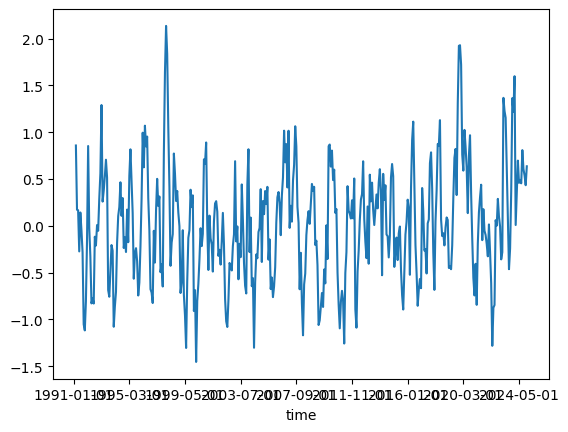

In [43]:
eth_spi.groupby('time')['spi_gamma_3_month'].mean().plot()


In [9]:
recent_eth_spi.head()

Unnamed: 0       lat        lon        time  spi_gamma_3_month  \
81196369    81196369  3.424999  39.524994  2015-02-01          -0.736124   
81196370    81196370  3.424999  39.524994  2015-03-01           0.470423   
81196371    81196371  3.424999  39.524994  2015-04-01           0.555980   
81196372    81196372  3.424999  39.524994  2015-05-01           0.422528   
81196373    81196373  3.424999  39.524994  2015-06-01           0.286956   

         country_iso  admin1 admin2  admin3  
81196369         ETH  Somali  Liben  Moyale  
81196370         ETH  Somali  Liben  Moyale  
81196371         ETH  Somali  Liben  Moyale  
81196372         ETH  Somali  Liben  Moyale  
81196373         ETH  Somali  Liben  Moyale

In [44]:
import pandas as pd
import plotly.express as px

def generate_map(recent_eth_spi):

        
    # 시간 정렬 및 문자열 변환
    recent_eth_spi['time'] = pd.to_datetime(recent_eth_spi['time'])
    recent_eth_spi = recent_eth_spi.sort_values('time')
    recent_eth_spi['time_str'] = recent_eth_spi['time'].dt.strftime('%Y-%m-%d')
    
    # NaN 제거
    plot_df = recent_eth_spi.dropna(subset=['spi_gamma_3_month'])
    
    if plot_df.empty:
        print("No valid data points to plot.")
        return None

    # 시각화
    fig = px.scatter_mapbox(
        plot_df,
        lat="lat",
        lon="lon",
        color="spi_gamma_3_month",
        animation_frame="time_str",
        color_continuous_scale="RdBu", 
        range_color=[-3, 3],
        zoom=5,
        center={"lat": 9.145, "lon": 40.489673},
        height=800,
        title="SPI (Standardized Precipitation Index) - Ethiopia",
        opacity=0.7,
        mapbox_style="carto-positron"
    )
    fig.update_traces(marker=dict(size=5))
    fig.show()

# 사용 예시 (노트북에서)
# dataset = pd.read_csv('../data/processed/spi/06_spi_csv/east_africa_spi_gamma_3_month_with_boundaries.csv', chunksize=1_000_000)
# generate_map(dataset)



In [45]:

tmp = recent_eth_spi[recent_eth_spi['time']=='2015-02-01']
generate_map(tmp)

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1210451056.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1210451056.py:20: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [46]:
import matplotlib.pyplot as plt
import plotly.express as px

df = (recent_eth_spi
      .groupby(['time', 'admin3'], as_index=False)
      .agg(spi_gamma_3_month=('spi_gamma_3_month', 'mean'))
     )

fig = px.line(
    df,
    x="time",
    y="spi_gamma_3_month",
    color="admin3",          # 라인 구분
    markers=True,            # 옵션: 점 표시
    title="SPI gamma (3-month) over time by admin3"
)

# time이 문자열이면 날짜로 변환(필요할 때만)
# df["time"] = pd.to_datetime(df["time"])

fig.update_layout(
    xaxis_title="time",
    yaxis_title="spi_gamma_3_month",
    legend_title="admin3",
    hovermode="x unified"
)

fig.show()

## 1-2. Can we find the drought using SPI data?

In [47]:

fig = px.histogram(
    df,
    x="spi_gamma_3_month",
    animation_frame="time",
    nbins=40,
    title="Distribution over time (animated)"
)
fig.show()

In [48]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.violin(
    df,
    x="time",
    y="spi_gamma_3_month",
    points=False,
    box=False,
    title="Distribution by time (with mean dots)"
)

mean_df = df.groupby("time", as_index=False)["spi_gamma_3_month"].mean()

fig.add_trace(
    go.Scatter(
        x=mean_df["time"],
        y=mean_df["spi_gamma_3_month"],
        mode="markers",
        marker=dict(size=7),
        name="Mean"
    )
)

fig.update_layout(hovermode="x unified")
fig.show()

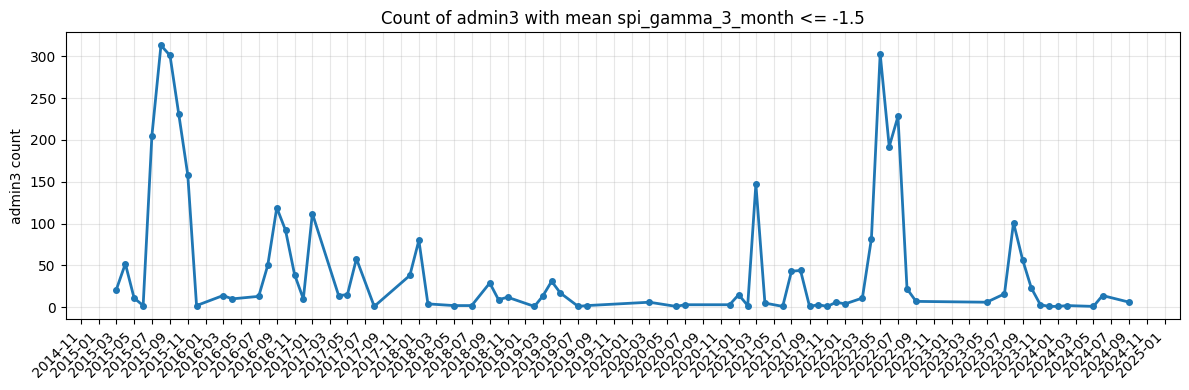

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# time 정리(문자열이면 datetime으로) + 정렬
cnt_df = cnt_df.copy()
cnt_df["time"] = pd.to_datetime(cnt_df["time"], errors="coerce")
cnt_df = cnt_df.sort_values("time")

ax = cnt_df.plot(
    x="time",
    y="n_admin3_leq_threshold",
    figsize=(12, 4),
    lw=2,
    marker="o",
    ms=4,
    legend=False
)

ax.set_title("Count of admin3 with mean spi_gamma_3_month <= -1.5")
ax.set_xlabel("")
ax.set_ylabel("admin3 count")
ax.grid(True, alpha=0.3)

# x축 날짜 라벨 깔끔하게 (월 단위 예시)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # 2개월마다(필요하면 1/3/6으로)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 1-3. How does the prices look like in those that experienced drought?

In [72]:
eth
eth['unit'] = eth['unit'].replace("KG", "1 KG").replace('L', '1L')
eth['unit'].unique()

eth['unit_denomination'] = eth['unit'].str.extract(r'(\d+)')[0]
eth['unit_denomination'] = eth['unit_denomination'].astype(float)
eth['unit_denomination'].unique()
eth['price_per_unit(usd)'] = eth['usdprice']/eth['unit_denomination']
eth['price_per_unit(usd)'].unique()

eth = eth.dropna()

# df = (recent_eth_spi
#       .groupby(['time', 'admin3'], as_index=False)
#       .agg(spi_gamma_3_month=('spi_gamma_3_month', 'mean'))
#      )

# fig = px.line(
#     df,
#     x="time",
#     y="spi_gamma_3_month",
#     color="admin3",          # 라인 구분
#     markers=True,            # 옵션: 점 표시
#     title="SPI gamma (3-month) over time by admin3"
# )
eth.head()

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1332488876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1332488876.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_5683/1332488876.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

countryiso3        date       admin1    admin2        market  market_id  \
208         ETH  2019-01-15  Addis Ababa  AA ZONE1   Addis Ababa        480   
225         ETH  2019-01-15  Addis Ababa  AA ZONE1   Addis Ababa        480   
227         ETH  2019-01-15  Addis Ababa  AA ZONE1   Addis Ababa        480   
228         ETH  2019-01-15       Amhara  E. GOJAM  Debre Markos        502   
243         ETH  2019-01-15       Oromia  E. SHEWA    Shashemene        488   

     latitude  longitude            category        commodity  commodity_id  \
208      9.02      38.75  cereals and tubers    Maize (white)            67   
225      9.02      38.75  cereals and tubers    Sorghum (red)           282   
227      9.02      38.75  cereals and tubers  Sorghum (white)           135   
228     10.33      37.73  cereals and tubers            Wheat            84   
243      7.18      38.58  cereals and tubers            Wheat            84   

       unit priceflag  pricetype currency    price  usdprice  \
208  100 KG    actual  Wholesale      ETB   674.25     23.86   
225  100 KG    actual  Wholesale      ETB   822.60     29.11   
227  100 KG    actual  Wholesale      ETB  1511.17     53.47   
228  100 KG    actual  Wholesale      ETB  1265.00     44.76   
243  100 KG    actual  Wholesale      ETB  1400.00     49.54   

     unit_denomination  price_per_unit(usd)  
208              100.0               0.2386  
225              100.0               0.2911  
227              100.0               0.5347  
228              100.0               0.4476  
243              100.0               0.4954

In [89]:

# df = (eth
#       .groupby(['time'], as_index=False)
#       .agg(spi_gamma_3_month=('spi_gamma_3_month', 'mean'))
#      )

eth_month = eth.groupby(['date','commodity'], as_index=False).agg(average_price = ('price_per_unit(usd)', 'mean'))
eth_month
fig = px.line(
    eth_month,
    x="date",
    y="average_price",
    color="commodity",          # 라인 구분
    markers=True,            # 옵션: 점 표시
    title="Average price of food per commodity in Ethiopiaover time by commodity"
)
fig.show()

- Obviously in 2022 ~ 2022, sudden price increase mostly driven by sorghum (mixed)

In [ ]:
eth_month = eth.groupby(['date', 'commodity'], as_index=False).agg(
    average_price=('price_per_unit(usd)', 'mean')
)
# date가 datetime인지 확인
eth_month["date"] = pd.to_datetime(eth_month["date"])

# 정렬 (중요: groupby+shift 전에 정렬해야 함)
eth_month = eth_month.sort_values(["commodity", "date"])
eth_month["price_lag_12"] = (
    eth_month
    .groupby("commodity")["average_price"]
    .shift(12)
)

# YoY inflation (%)
eth_month["inflation_yoy"] = (
    (eth_month["average_price"] / eth_month["price_lag_12"] - 1) * 100
)
import plotly.express as px

fig = px.line(
    eth_month,
    x="date",
    y="inflation_yoy",
    color="commodity",fig = px.line(
    eth_inf,
    x="date",
    y="inflation_yoy",
    facet_col="commodity",
    facet_col_wrap=4,           # 한 줄에 4개씩
    facet_col_spacing=0.03,
    facet_row_spacing=0.05,
    title="YoY Inflation by Commodity (Small Multiples)"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # facet 제목 깔끔하게
fig.update_yaxes(matches=None)  # y축 스케일 공유 안 하고 각자
fig.add_hline(y=0, line_dash="dash")
fig.show()fig = px.line(
    eth_inf,
    x="date",
    y="inflation_yoy",
    facet_col="commodity",
    facet_col_wrap=4,           # 한 줄에 4개씩
    facet_col_spacing=0.03,
    facet_row_spacing=0.05,
    title="YoY Inflation by Commodity (Small Multiples)"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # facet 제목 깔끔하게
fig.update_yaxes(matches=None)  # y축 스케일 공유 안 하고 각자
fig.add_hlㅁㅁ
    markers=True,
    title="YoY Inflation Rate of Sorghum Price by Commodity"
)
fig.add_hline(y=0, line_dash="dash")  # 0% 기준선
fig.show()

In [91]:
fig = px.line(
    eth_month,
    x="date",
    y="z_score",
    color="commodity",
    title="Price Z-score vs Rolling Normal"
)
fig.add_hline(y=0, line_dash="dash")
fig.add_hline(y=2, line_dash="dot")
fig.add_hline(y=-2, line_dash="dot")
fig.show()